# Analyzing the Impact of Chicago’s Energy Rating Placard Policy on Building Energy Use

**Author:** Han Zhang  
**Date:** October 2025  
**Course/Project:** Data Science Research – Chicago Energy Benchmarking  

---

### Summary
This notebook examines how building energy performance in Chicago changed before and after the implementation of the Energy Rating Placard policy in 2019.  
We compare key metrics such as *electricity use (kBtu)* and *Energy Star Score* between the two periods using data from city benchmarking reports.  
The analysis includes visual comparisons, statistical summaries, and interpretations of observed trends, aiming to assess whether energy efficiency improved following the policy’s introduction.


## Section 1: Data Setup

First we begin by loading necessary modules as well as reading in our data. This assumes that reader.py found in /project/src/utils/ has been run already sending joint csv to /project/src/output

In [5]:
# Standard library imports
import sys

# Third-party imports

# Add utils folder to Python path
sys.path.append("../utils")

# Local application imports
from data_utils import load_data
from plot_utils import compare_variable_distribution

energy_df = load_data()

energy_df.head()

,Data Year,ID,Property Name,Address,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,...,Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Reporting Status,Chicago Energy Rating,Exempt From Chicago Energy Rating,Water Use (kGal),Row_ID
18573,2014,103748,nmh olson pavilion,710 N Fairbanks Ct,60611,near north side,laboratory,362800.0,1977.0,1.0,...,21444.0,59.11,41.895310,-87.620363,point (-87.620363 41.89531),submitted,NaN,nan,NaN,2014-103748
18503,2014,101923,311 west monroe,311 West Monroe,60606,loop,office,411672.0,1969.0,1.0,...,11363.0,27.60,41.880305,-87.635701,point (-87.63570062 41.88030523),submitted,NaN,nan,NaN,2014-101923
18504,2014,100851,600 w chicago,600 W Chicago,60654,near north side,office,1434236.0,1908.0,1.0,...,25200.0,17.57,41.896501,-87.642880,point (-87.64288 41.896501),submitted,NaN,nan,NaN,2014-100851
18505,2014,103632,nmh feinberg pavilion and galter pavilion,251 E Huron St.,60654,near north side,hospital (general medical & surgical),2200000.0,1999.0,1.0,...,51047.0,23.20,41.894587,-87.621528,point (-87.62152834 41.89458666),submitted,NaN,nan,NaN,2014-103632
18506,2014,103608,329 w 18th street,329 W 18th Street,60616,lower west side,office,406780.0,1911.0,1.0,...,2652.0,6.52,41.857685,-87.636254,point (-87.636254 41.857685),submitted,NaN,nan,NaN,2014-103608


Next, we will split our data into two dataframes. One going up to 2019 and one from everything after 2019 to observe any potential differences.

In [6]:
# Split the DataFrame into two based on Benchmark_Year
placard_year = 2019
energy_df_pre_2019 = energy_df[energy_df["Data Year"] < placard_year].copy()
energy_df_post_2019 = energy_df[energy_df["Data Year"] >= placard_year].copy()

# Print summary of the split
print(f"📊 Entries up to 2019: {energy_df_pre_2019.shape[0]:,} rows")
print(f"📊 Entries after 2019: {energy_df_post_2019.shape[0]:,} rows")

display(energy_df_pre_2019.head(2))
display(energy_df_post_2019.head(2))

📊 Entries up to 2019: 10,708 rows
📊 Entries after 2019: 17,621 rows


,Data Year,ID,Property Name,Address,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,...,Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Reporting Status,Chicago Energy Rating,Exempt From Chicago Energy Rating,Water Use (kGal),Row_ID
18573,2014,103748,nmh olson pavilion,710 N Fairbanks Ct,60611,near north side,laboratory,362800.0,1977.0,1.0,...,21444.0,59.11,41.895310,-87.620363,point (-87.620363 41.89531),submitted,NaN,nan,NaN,2014-103748
18503,2014,101923,311 west monroe,311 West Monroe,60606,loop,office,411672.0,1969.0,1.0,...,11363.0,27.60,41.880305,-87.635701,point (-87.63570062 41.88030523),submitted,NaN,nan,NaN,2014-101923


,Data Year,ID,Property Name,Address,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,...,Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Reporting Status,Chicago Energy Rating,Exempt From Chicago Energy Rating,Water Use (kGal),Row_ID
7277,2019,252121,ronald mcdonald house near lurie children's,211 E Grand Ave,60611,near north side,hotel,106200.0,2012.0,1.0,...,1318.5,12.4,41.891458,-87.622135,point (-87.62213489 41.89145765),submitted,2.0,false,3257.0,nan
6603,2019,250149,216 w jackson blvd,216 W Jackson Blvd,60606,loop,office,172121.0,1920.0,1.0,...,4960.3,28.8,41.878434,-87.634499,point (-87.63449855 41.87843368),submitted,1.0,false,NaN,nan


## Section 2: Basic Plots

Now, we will use the compare_variable_distribution function defined in utils/plot_utils.py to compare different statistics before and after 2019. This way we can have a rough measure to judge the impact of the Chicago Energy Rating Placards.

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'ENERGY STAR Score Comparison: Before 2019 vs After 2019'}, ylabel='ENERGY STAR Score'>)

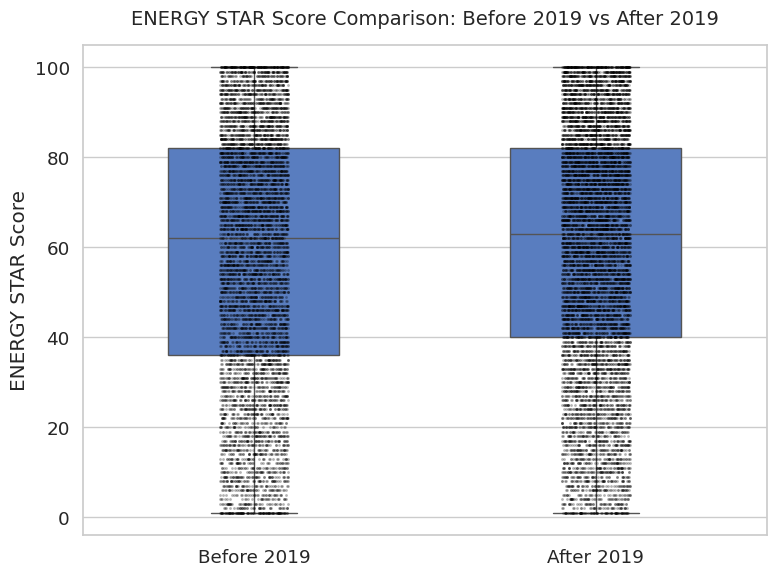

In [7]:
compare_variable_distribution(
    energy_df_pre_2019, energy_df_post_2019, "ENERGY STAR Score"
)

First, observing the ENERGY STAR Score comparison between the two dataframes, we do see a slight improvement in ENERGY STAR Scores starting in 2019.

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Electricity Use (kBtu) Comparison: Before 2019 vs After 2019'}, ylabel='Electricity Use (kBtu)'>)

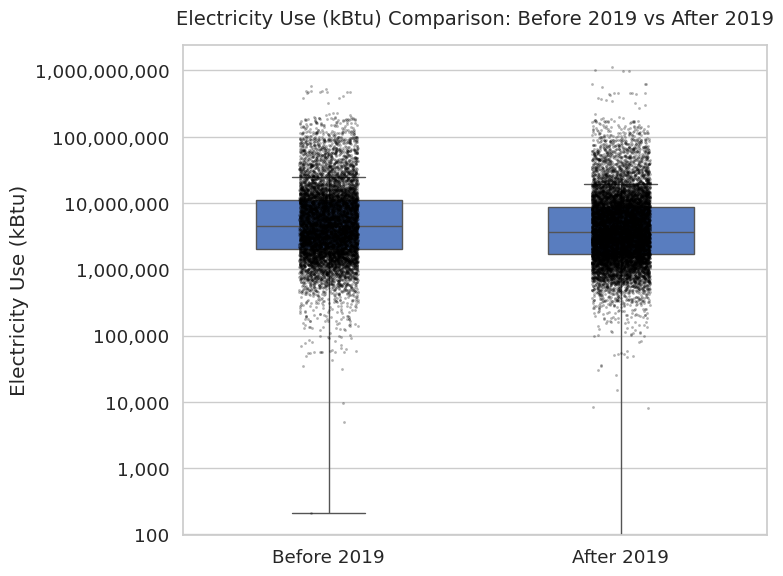

In [8]:
compare_variable_distribution(
    energy_df_pre_2019,
    energy_df_post_2019,
    variable="Electricity Use (kBtu)",
    label1="Before 2019",
    label2="After 2019",
    log_scale=True,
)

Next, we compare the Electricity Use (kBtu) and observe noticeably better usage starting in 2019. A log-scale is used here to compress the wide range and make the patterns more easily visible.

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Natural Gas Use (kBtu) Comparison: Before 2019 vs After 2019'}, ylabel='Natural Gas Use (kBtu)'>)

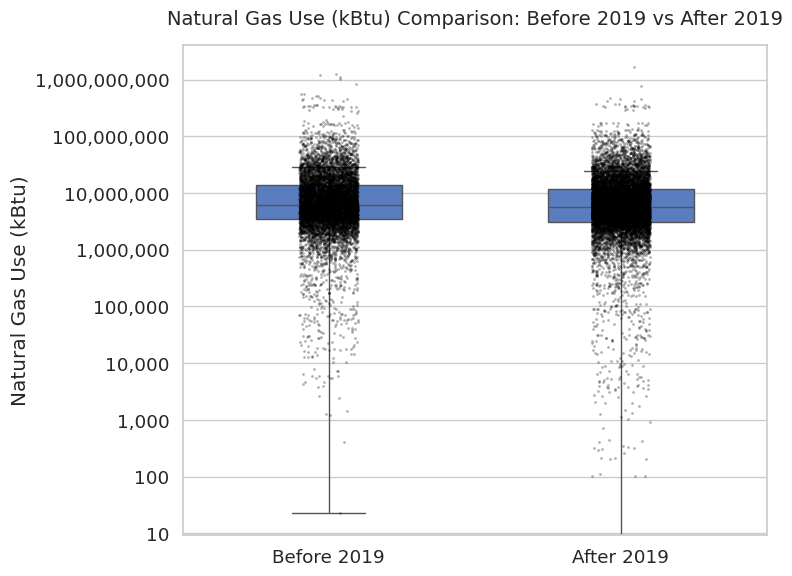

In [9]:
compare_variable_distribution(
    energy_df_pre_2019,
    energy_df_post_2019,
    variable="Natural Gas Use (kBtu)",
    label1="Before 2019",
    label2="After 2019",
    log_scale=True,
)

Looking at the Natural Gas Use (kBtu) we see a similar trend as the previous visualization of Electricity Use.

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'GHG Intensity (kg CO2e/sq ft) Comparison: Before 2019 vs After 2019'}, ylabel='GHG Intensity (kg CO2e/sq ft)'>)

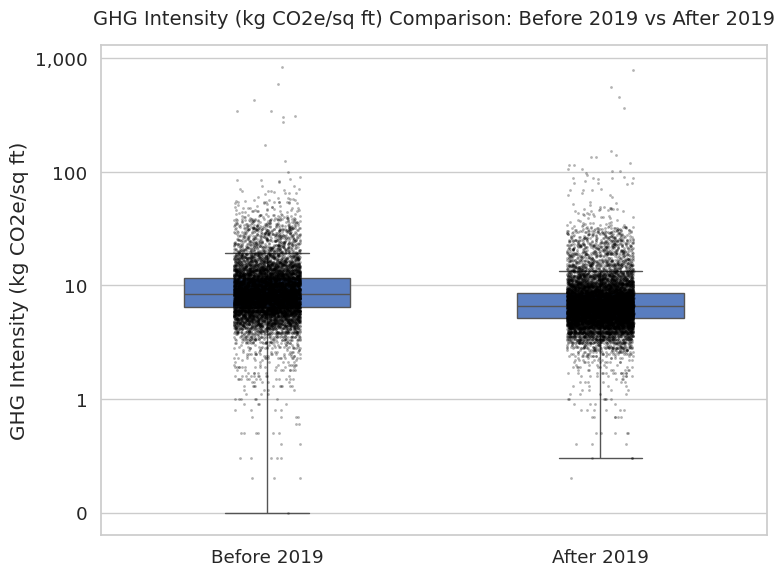

In [12]:
compare_variable_distribution(
    energy_df_pre_2019,
    energy_df_post_2019,
    "GHG Intensity (kg CO2e/sq ft)",
    log_scale=True,
)

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Site EUI (kBtu/sq ft) Comparison: Before 2019 vs After 2019'}, ylabel='Site EUI (kBtu/sq ft)'>)

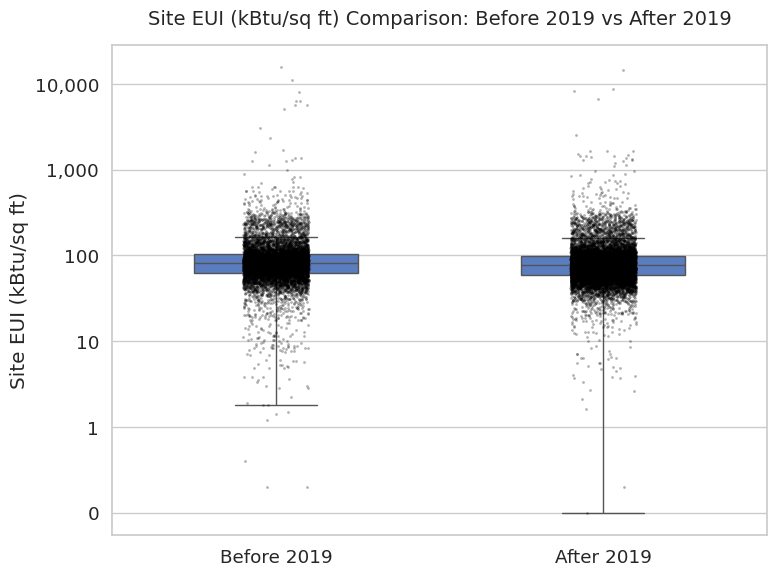

In [11]:
compare_variable_distribution(
    energy_df_pre_2019,
    energy_df_post_2019,
    variable="Site EUI (kBtu/sq ft)",
    label1="Before 2019",
    label2="After 2019",
    log_scale=True,
)

Finally, we compare GHG intensity and Site EUI, but don't see any significant differences between the datasets. 

## Section 3: Conclusions

Overall, we see some evidence in building changes after the implementation of Chicago's Energy Rating Placards. ENERGY STAR Score, Electricity Use, and Natural Gas Use all show improvement starting in 2019 following the implementation of Chicago's Energy Rating Placards. However, we have yet to determine the cause of these improvements as Chicago's Energy Rating Placards may be unrelated. At the same time GHG Intensity and Site EUI don't show significant differences. 